# Exercise 7 | Principle Component Analysis and K-Means Clustering

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from scipy.io import loadmat

## Part 1: Find Closest Centroids

To help you implement K-Means, we have divided the learning algorithm
into two functions -- findClosestCentroids and computeCentroids. In
this part, you shoudl complete the code in the findClosestCentroids
function.

In [2]:
mat = loadmat('ex7data2.mat')
X = mat['X']

In [3]:
# select an initial set of centroids
K = 3
initial_centroids = np.array([[3, 3],
                              [6, 2],
                              [8, 5]])


In [4]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))
    
    idx_candi = np.zeros((X.shape[0], K))
    for i in range(K):
        centroid_i = centroids[i, :]
        idx_candi[:, i] = np.sum(np.power(X - centroid_i, 2), axis=1)

    return np.argmin(idx_candi, axis=1)

In [5]:
# find the closest centroids for the examples using the initial_centroids
idx = find_closest_centroids(X, initial_centroids)

print(f'''Closest centroids for the first 3 examples:
{idx[:3]}
(the closest centroids should be 0, 2, 1 respectively)''')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


## Part 2: Compute Means

After implementing the closest centroids function, you should now
complete the computeCentroids function.

In [6]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for i in range(K):
        cluster_i = X[np.where(idx == i)[0], :]
        if cluster_i.shape[0] == 0:
            centroids[i, :] = 0
        else:
            centroids[i, :] = np.mean(cluster_i, axis=0)
            
    return centroids

In [7]:
centroids = compute_centroids(X, idx, K)

print(f'''Centroids computed after initial finding of closest centroids:
{centroids}
(the centroids should be
[ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ])''')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
(the centroids should be
[ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ])


## Part 3: K-Means Clustering

After you have completed the two functions computeCentroids and
findClosestCentroids, you have all the necessary pieces to run the
kMeans algorithm. In this part, you will run the K-Means algorithm on
the example dataset we have provided.

*
The code it implemented to best mimic course coding paradigm. In real
world, please use `sklearn.cluster.KMeans`.
*

In [8]:
def plot_progress_kmeans(X, centroids, previous, idx, K, i):
    plt.figure()
    plt.title(f'Iteration number {i}')
    plot_data_points(X, idx)
    
    plt.plot(centroids[:, 0], centroids[:, 1], 'x', markeredgecolor='k', markersize=10, linewidth=3)
    for u, v in np.dstack((centroids, previous)):
        plt.plot(u, v)

def plot_data_points(X, idx):
    colors = np.array(['r', 'g', 'b'])[idx]
    plt.scatter(X[:, 0], X[:, 1], 15, c=colors);

def run_kmeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)

        # plot progress
        if plot_progress:
            plot_progress_kmeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)
    
    return centroids, idx

In [9]:
mat = loadmat('ex7data2.mat')
X = mat['X']

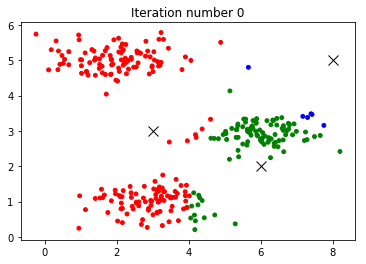

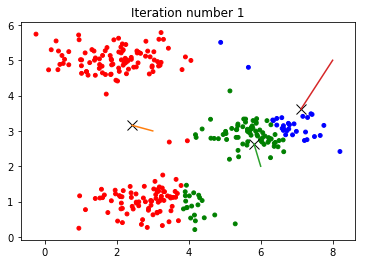

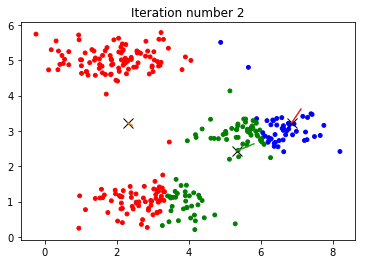

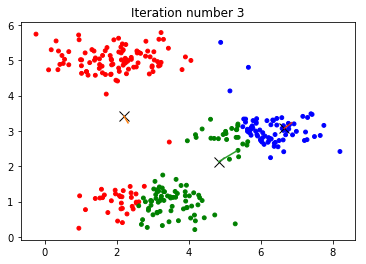

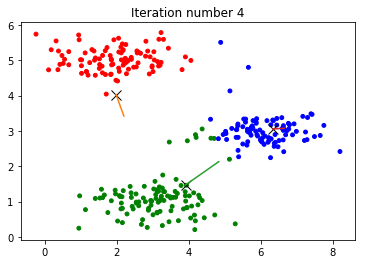

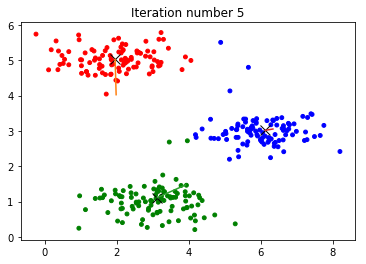

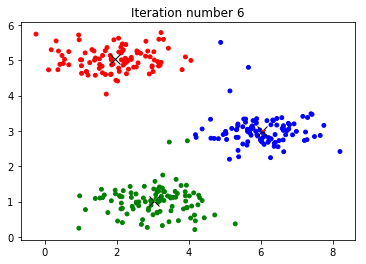

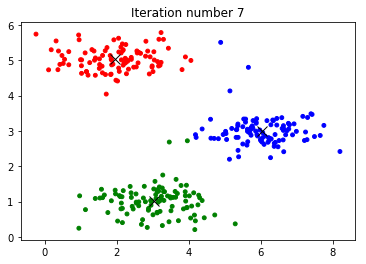

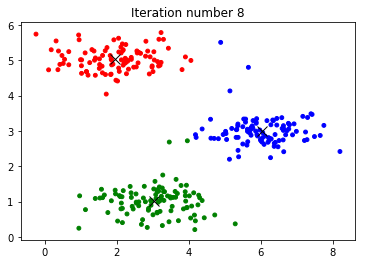

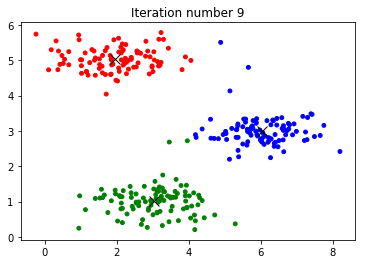

In [10]:
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values but in
# practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3],
                              [6, 2],
                              [8, 5]])

centroids, idx = run_kmeans(X, initial_centroids, max_iters, True)

## Part 4: K-Means Clustering on Pixels

In this exercise, you will use K-Means to compress an image. To do
this, you will first run K-Means on the colors of the pixels in the
image and then you will map each pixel on to it's closest centroid.

In [11]:
def kmeans_init_centroids(X, K):
    centroids = np.zeros((K, X.shape[1]))
    randidx = np.random.permutation(X.shape[0])

    return X[randidx[:K]]

In [12]:
A = np.double(mpimg.imread('bird_small.png'))
img_size = A.shape
X = A.reshape((-1, 3))
K = 16
max_iters = 10

# when using K-Means, it is important the initialize the centroids randomly
initial_centroids = kmeans_init_centroids(X, K)
centroids, idx = run_kmeans(X, initial_centroids, max_iters)

## Part 5: Image Compression

In this part of the exercise, you will use the clusters of K-Means to
compress an image. To do this, we first find the closest clusters for
each example.

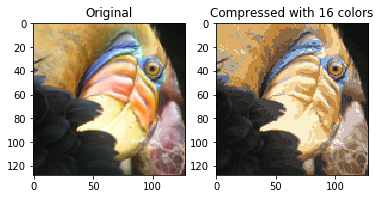

In [13]:
idx = find_closest_centroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the indices in idx. 

# We can now recover the image from the indices (idx) by mapping each
# pixel (specified by it's index in idx) to the centroid value
X_recovered = centroids[idx]
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(A)

plt.subplot(1, 2, 2)
plt.title(f'Compressed with {K} colors')
plt.imshow(X_recovered);